In [97]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, RidgeCV, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, RepeatedKFold,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Reading Data

In [20]:
# Read the data
df = pd.read_csv('train.csv')

# Get only the numeric columns for simplicity purpose
df = df._get_numeric_data()

# remove outliers that are within +3 to -3 standard deviations and apply to all columns
df = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

# Check for null values
sum(df.isna().sum())

0

In [21]:
df.head(2)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500


In [22]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,...,796.000000,796.000000,796.000000,796.000000,796.000000,796.0,796.000000,796.000000,796.000000,796.000000
mean,728.508794,53.285176,67.758794,9119.143216,6.173367,5.516332,1975.683417,1986.792714,86.809045,406.453518,...,87.520101,43.145729,15.962312,0.028894,6.623116,0.0,12.530151,6.253769,2007.791457,177343.172111
std,424.419149,40.171555,20.307624,3527.889665,1.318507,0.975671,29.733369,21.109978,134.294762,406.100891,...,105.732002,53.219577,44.688592,0.815213,30.092665,0.0,93.212007,2.665111,1.350230,65759.813696
min,1.000000,20.000000,21.000000,1300.000000,2.000000,3.000000,1885.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,2006.000000,35311.000000
25%,371.250000,20.000000,58.000000,7239.750000,5.000000,5.000000,1954.750000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.000000,2007.000000,129500.000000
50%,725.500000,50.000000,68.500000,9049.000000,6.000000,5.000000,1978.000000,1997.000000,0.000000,376.000000,...,0.000000,29.000000,0.000000,0.000000,0.000000,0.0,0.000000,6.000000,2008.000000,164995.000000
75%,1100.250000,60.000000,80.000000,10800.000000,7.000000,6.000000,2004.000000,2005.000000,150.750000,690.000000,...,168.000000,64.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,2009.000000,214000.000000
max,1457.000000,180.000000,141.000000,31770.000000,10.000000,8.000000,2009.000000,2010.000000,640.000000,1646.000000,...,468.000000,244.000000,205.000000,23.000000,180.000000,0.0,1300.000000,12.000000,2010.000000,402861.000000


## Analyzing correlation

In [23]:
# Do not consider the correlation with ID column
corr = pd.DataFrame(df.corr(method = 'pearson')['SalePrice'])
corr.sort_values(['SalePrice'], ascending= False)

,SalePrice
SalePrice,1.000000
OverallQual,0.816982
GrLivArea,0.751348
GarageCars,0.688812
GarageArea,0.661599
FullBath,0.660803
TotalBsmtSF,0.643252
YearBuilt,0.629826
1stFlrSF,0.609141
TotRmsAbvGrd,0.591916


### Visual Analysis

Let's use **pairplots** to check for linear relationship with Sales Price 

I will divide the pairplots to make it easier to visualize and analyze the plots

In [24]:
list_var = [x for x in df.columns if x != 'SalePrice']

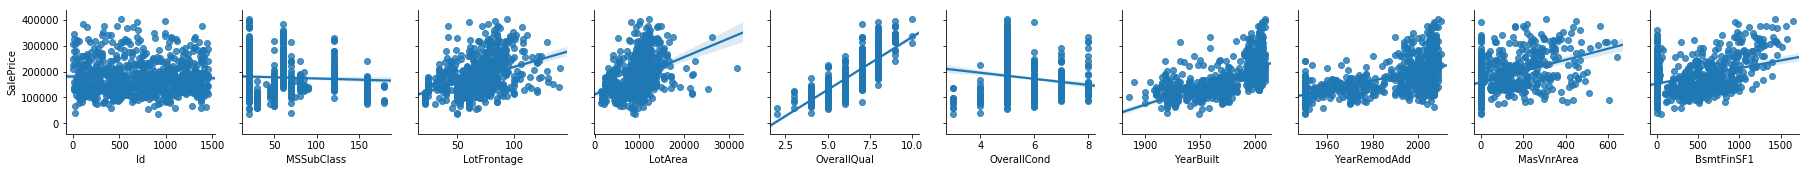

In [25]:
pp = sns.pairplot(data=df,
                  y_vars=['SalePrice'],
                  x_vars=list_var[:10], kind="reg")

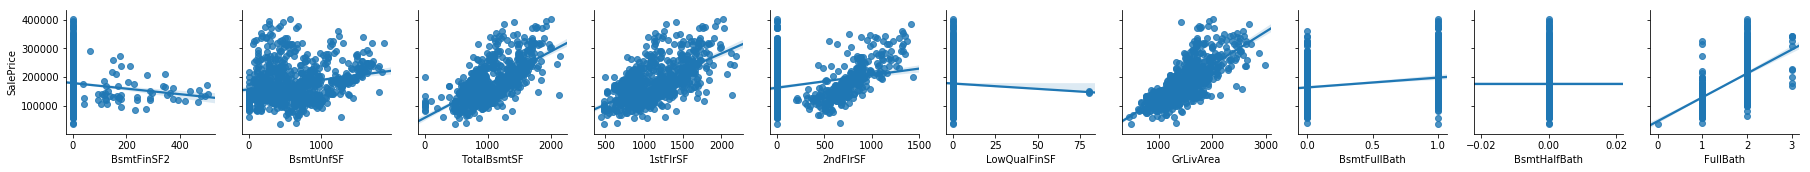

In [26]:
pp = sns.pairplot(data=df,
                  y_vars=['SalePrice'],
                  x_vars=list_var[10:20], kind="reg")

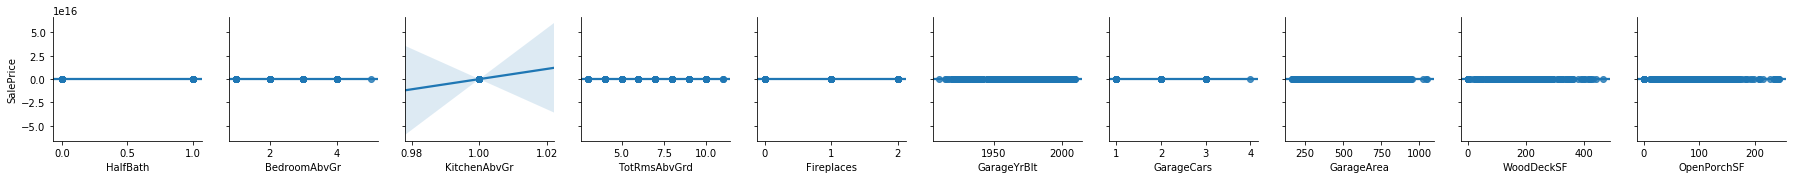

In [27]:
pp = sns.pairplot(data=df,
                  y_vars=['SalePrice'],
                  x_vars=list_var[20:30], kind="reg")

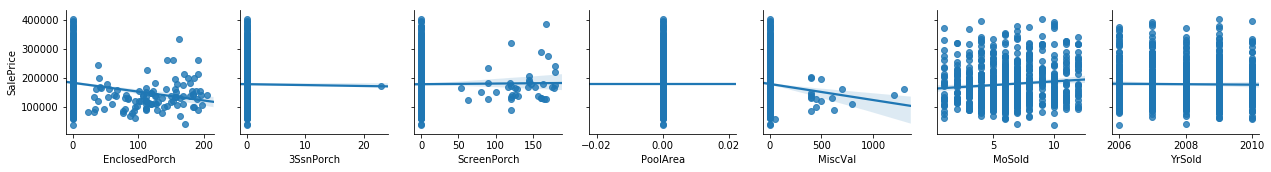

In [28]:
pp = sns.pairplot(data=df,
                  y_vars=['SalePrice'],
                  x_vars=list_var[30:], kind="reg")

In [29]:
# Select feature columns that will be used on the regression analysis
X = df[['LotFrontage','LotArea','OverallQual','OverallCond',
        'YearRemodAdd','1stFlrSF','GrLivArea',
        'GarageYrBlt', 'GarageArea']]

In [30]:
# Select our target/dependent variable
y = df['SalePrice']

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=42)

## Simple Linear Regression
 Let's first perform a simple linear regression first, and to do so I selected OverallQual column, cause the pairplots and the correlation analysis above showed that it has a strong relation to the SalePrice.
 
 
Y= β0 + β1X1 + e

In [31]:
# create linear regression object
regr = linear_model.LinearRegression()

# train the model, using only one independent variable
simple_column = ['OverallQual']
regr.fit(X_train[simple_column], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### The intercept
Predicted value for y if X == 0

As there is no data points that X == 0 in the dataset, the intercept is just part of the linear regression function

In [33]:
print('B0 or y-intercept:', regr.intercept_)

B0 or y-intercept: -68130.5995922293


#### The coefficient



In [34]:
print('Coefficients: ', regr.coef_[0])

Coefficients:  39983.271440661665


#### Let's write our model

Y = intercept + coefficient * X + e


Y = 6086.76 + 118.71 * X + e

In [35]:
# make predictions using the testing set
y_pred_test = regr.predict(X_test[simple_column])

### Evaluating the model

**Mean Squared Error**

In [37]:
mse_simple_linreg = np.sqrt(mean_squared_error(y_pred_test, y_test))
print('We are on average USD', mse_simple_linreg, 'away from the real value of the house')

We are on average USD 36922.94970597111 away from the real value of the house


**R2**

Measures proportion of variability in Y that is explained by X using our model

Explained variance score: 1 is perfect prediction

In [38]:
print('Variance score: %.2f' % r2_score(y_test, y_pred_test))

Variance score: 0.67


#### Visualizing results

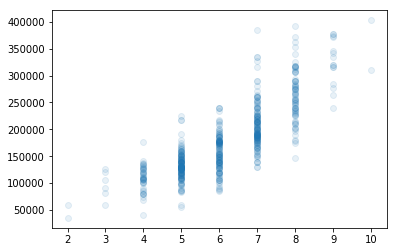

In [40]:
# plot training data points
plt.scatter(X_train['OverallQual'],y_train,alpha=.1)
# vec = np.linspace(0,4000,1000)
# plt.plot(vec, regr.intercept_ + regr.coef_[0]*vec)

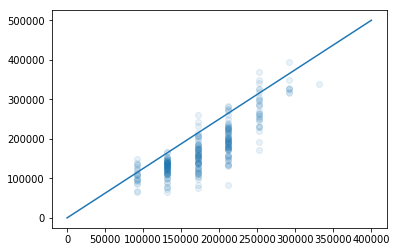

In [42]:
## Plot predicted vs actual 
plt.scatter(y_pred_test,y_test,alpha=.1)
plt.plot(np.linspace(0,400000,1000),np.linspace(0,500000,1000))

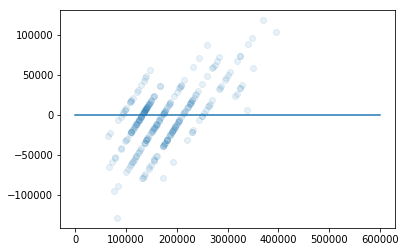

In [43]:
# Residual Plot
# Plot predicted vs actual 

plt.scatter(y_test, y_test-y_pred_test, alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))

## Multiple Linear Regression

Now we will use all the other features that we find a relation with SalePrice when analyzing the pairplots.

Y = β0 + β1X1 + β2X2 … + βnXn + e

In [44]:
# train the model
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
print('B0 or y-intercept:', regr.intercept_)

B0 or y-intercept: -1121267.0650649858


In [46]:
# print('Coefficients: ', regr.coef_[0])
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regr.coef_[idx]))

The coefficient for LotFrontage is 81.92075468834119
The coefficient for LotArea is 1.7468364457017582
The coefficient for OverallQual is 18071.787166822116
The coefficient for OverallCond is 5254.453724345112
The coefficient for YearRemodAdd is 243.56182581961085
The coefficient for 1stFlrSF is 26.14381713022485
The coefficient for GrLivArea is 47.49931722386255
The coefficient for GarageYrBlt is 268.66135710717253
The coefficient for GarageArea is 49.032358828435925


#### Let's write our model

Y = β0 + β1X1 + β2X2 … + βnXn + e

Y = -1044119.16 + (176.13 * X1) + (1.07 * X2) … + (42.44 * X9) + e


### Model Explanation
When we added the other features all model performed much better.

Let's analyze which features were the most important to our model.

In [54]:
# !pip install eli5

In [61]:
# # create a PermutationImportance object
# import eli5
# from eli5.sklearn import PermutationImportance
# perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)

# eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Using this simple piece of code we can evaluate feature importance using Permutation Importance technique.

### Evaluating the model

In [59]:
# make predictions using the testing set
y_pred_test = regr.predict(X_test)

In [60]:
mse_simple_linreg = np.sqrt(mean_squared_error(y_pred_test, y_test))
print('We are on average USD', mse_simple_linreg, 'away from the real value of the house')

We are on average USD 26359.72271428816 away from the real value of the house


In [62]:
print('Variance score: %.2f' % r2_score(y_test, y_pred_test))

Variance score: 0.83


# Train with categorical data

In [67]:
# Read the data
df_train = pd.read_csv('train.csv')

# Get only the numeric columns for simplicity purpose
# df = df._get_numeric_data()

# remove outliers that are within +3 to -3 standard deviations and apply to all columns
# df = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

# Check for null values
sum(df_train.isna().sum())

6965

## Change NaN values

I will change all na values to NO, in caseit is a categorical feature

In [109]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
categorical = [x for x in df_train.select_dtypes(include=['object']).columns]


In [110]:
df_train[categorical].fillna('No', inplace=True)

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [ ]:
df_train = df_train.apply(lambda x: '')

In [ ]:
df_dum = pd.get_dummies(df_train, columns=categorical)

### Transform categorical data using frequency table

In [80]:
# df_out = pd.DataFrame()
# for i in range(len(categorical)):
#     c = categorical[i]
#     df = pd.DataFrame({'Variable':[c]*len(df_train[c].unique()),
#                        'Level':df_train[c].unique(),
#                        'Count':df_train[c].value_counts(dropna = False)})
#     df['Percentage'] = 100 * df['Count']  / df['Count'].sum()
#     df_out = df_out.append(df, ignore_index = True)
    
# df_out.head()

In [90]:
df_dum = pd.get_dummies(df_train, columns=categorical)

In [93]:
X = df_dum.drop(columns=['SalePrice'])

# Select our target/dependent variable
y = df_dum['SalePrice']

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=42)

# Random Forest

In [99]:
cv = RepeatedKFold(n_splits=12, n_repeats=15)
regr_rf1 = GridSearchCV(RandomForestRegressor(), cv=cv, verbose=1,
                  param_grid={"max_depth": np.arange(2,50,3)})

regr_rf1.fit(X_train.drop(columns=['Id']), y_train)
pred = regr_rf1.predict(X_test.drop(columns=['Id']))
print(regr_rf1.best_params_);

# model evaluation
print('Random Forest absolute error: ', mean_absolute_error(y_test, pred))
print('Random Forest squared error: ',mean_squared_error(y_test, pred))

print(regr_rf1.best_score_)

Fitting 180 folds for each of 16 candidates, totalling 2880 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').